In [1]:
import pandas as pd 
input = './stbl/REMBRANDTS_stbl.txt'
data = pd.read_table(input, index_col=0)

In [21]:
[c.split('_') for c in sorted(data.columns.tolist())]


[['hl60', '120h', 't'],
 ['hl60', '120h', 'u'],
 ['hl60', '6h', 't'],
 ['hl60', '6h', 'u'],
 ['hl60', '72h', 't'],
 ['hl60', '72h', 'u'],
 ['kg1', 't'],
 ['kg1', 'u'],
 ['molm14', 't'],
 ['molm14', 'u'],
 ['ociaml2', 't'],
 ['ociaml2', 'u'],
 ['ociaml3', 't'],
 ['ociaml3', 'u'],
 ['thp1', 't'],
 ['thp1', 'u']]

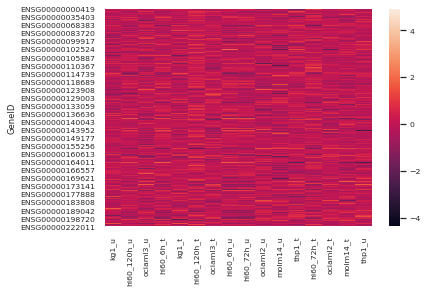

In [27]:
ax = sns.heatmap(data)

In [66]:
import os
if not os.path.exists('./results'):
    os.mkdir('results')
if not os.path.exists('./results/plots'):
    os.mkdir('results/plots')

# Differential Expression with Limma

In [26]:
library(edgeR)
library(Biobase)

In [2]:
counts <- read.delim("stbl/REMBRANDTS_stbl.txt", row.names = 1)
snames <- colnames(counts) # Sample names
cellline <- substr(snames, 1, nchar(snames) - 2) 
stype <- substr(snames, nchar(snames), nchar(snames))

head(counts)

,kg1_u,hl60_120h_u,ociaml3_u,hl60_6h_t,kg1_t,hl60_120h_t,ociaml3_t,hl60_6h_u,hl60_72h_u,ociaml2_u,molm14_u,thp1_t,hl60_72h_t,ociaml2_t,molm14_t,thp1_u
ENSG00000000419,-0.03511470,0.03949013,-0.6918019,0.314053989,-0.03677688,1.243788665,0.62159828,-0.01276121,0.052734240,-0.1756767,-0.6016266,-0.11272427,0.05585268,-0.008871377,-0.04810182,-0.60406260
ENSG00000000457,-0.30031975,0.44664494,-0.1986581,0.488421223,-0.06427136,0.527666824,0.26493892,0.33880083,0.288916808,-0.5582401,-0.1486987,-0.35550380,0.18261006,-0.637952417,-0.16433040,-0.11002502
ENSG00000000460,-0.42436384,0.25941913,-0.8250731,0.164435404,-0.21004552,1.020979764,0.01973046,0.11215189,0.307517533,-0.2584300,-0.5150778,0.31210083,0.45559594,-0.055953782,-0.15010619,-0.21288075
ENSG00000000938,-0.07327314,-0.24361895,0.4778324,-0.008015715,-0.28818609,0.475268387,-0.04405534,-0.43536264,-0.003408048,0.6823976,0.6769927,-0.16283331,-0.94851097,0.661234528,-0.70851355,-0.05794778
ENSG00000001036,-0.04773033,-0.32966341,0.3477298,-0.637825686,0.76220813,-0.004056283,0.19751394,-0.26544214,-0.157535167,-0.2775843,-0.1980873,0.20623903,-0.10660712,0.389068600,-0.14101087,0.26278307
ENSG00000001084,-0.35642069,0.09940976,-0.2477713,0.413491381,-0.31503155,0.310785075,-0.04017020,0.22092903,0.416367125,-0.4630122,-0.2389531,0.04638362,0.15909493,-0.130577773,0.25204901,-0.12657316


       u_vs_t
Down        0
NotSig   9706
Up          0


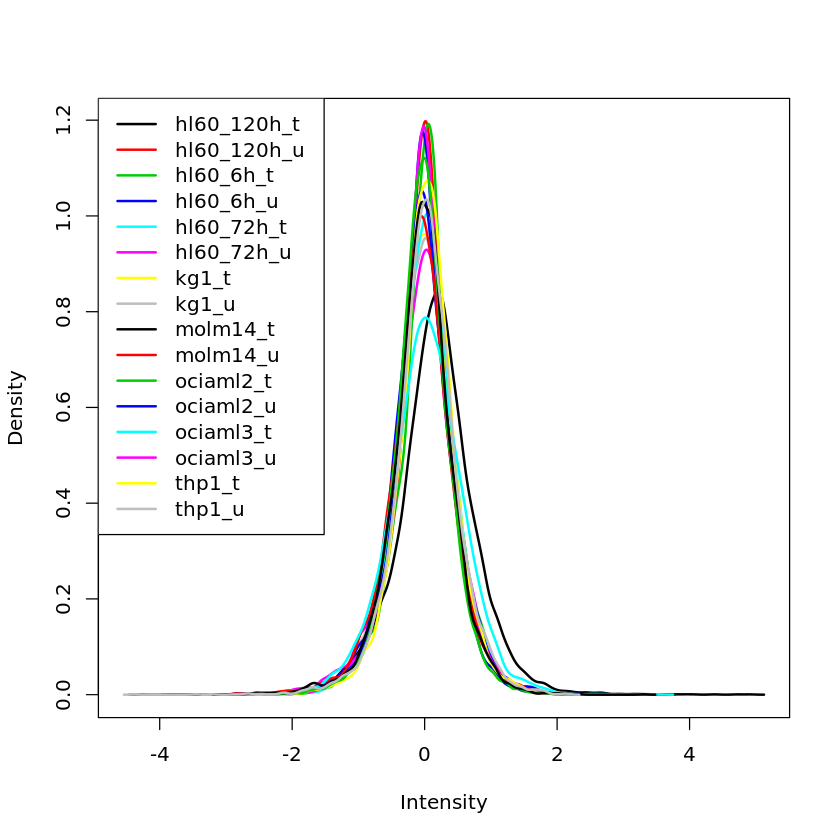

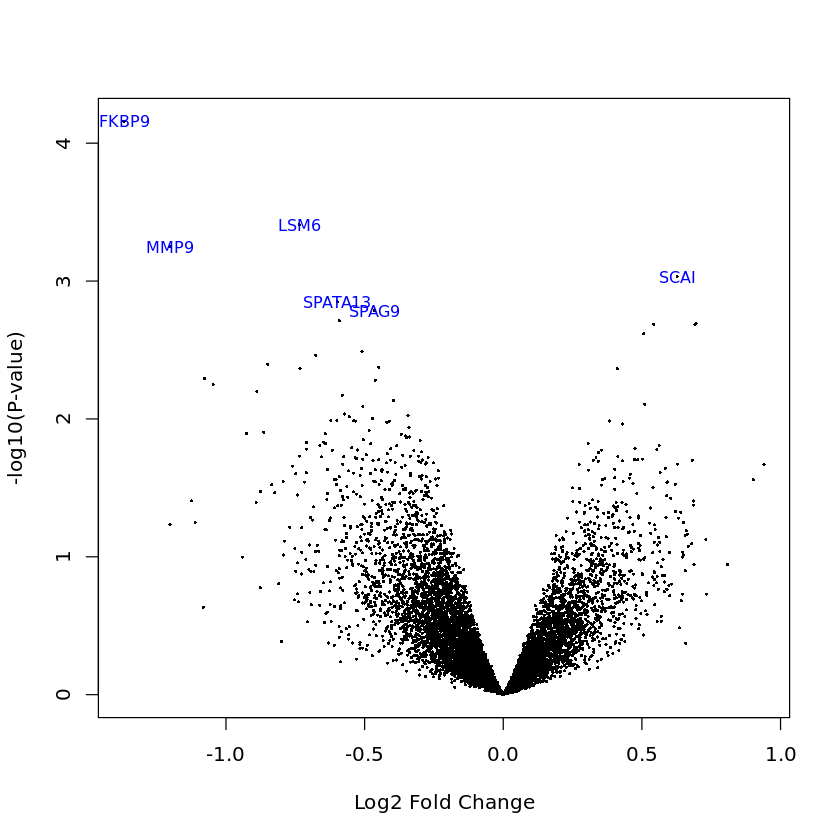

In [115]:
# add gene names to the expression objects 
id_transfer <- read.delim(
    "../../Workflows/RNA-seq/data/id_transfer/hg38/EnsemblIDtoGeneName.txt",
    row.names = 1)
f = data.frame(Gene_name = id_transfer[row.names(counts),], 
               row.names = row.names(counts))

p = data.frame(Cellline=cellline, Type=stype, row.names=snames)
eseq <- ExpressionSet(
    assayData = as.matrix(counts),
    phenoData = AnnotatedDataFrame(p),
    featureData = AnnotatedDataFrame(f)
)
design <- model.matrix(~0 + Type, pData(eseq))
cm = makeContrasts(u_vs_t = Typeu - Typet, levels = design)
### fit limma 
# Fit coefficients 
fit <- lmFit(eseq, design)
# Fit contrasts 
fit2 <- contrasts.fit(fit, contrasts = cm)
# Calculate t-statistics 
fit2 <- eBayes(fit2)
# Summarize results 
results <- decideTests(fit2)
print (summary (results))

plotDensities(eseq)
volcanoplot(fit2,highlight = 6, names = fit2$genes[,'Gene_name'])

In [ ]:
# for (u in unique(cellline)){
# w = which(cellline==u)
# p = data.frame(Cellline=cellline[w], Type=stype[w], row.names=snames[w])
# eseq <- ExpressionSet(
#     assayData = as.matrix(counts[,w]),
#     phenoData = AnnotatedDataFrame(p),
#     featureData = AnnotatedDataFrame(f)
# )
# }

In [120]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS/LAPACK: /rumi/shams/abe/anaconda3/envs/RADAR/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] Biobase_2.46.0      BiocGenerics_0.32.0 edgeR_3.28.0       
[4] limma_3.42.0       

loaded via a namespace (and not attached):
 [1] locfit_1.5-9.1  Rcpp_1.0.3      lattice_0.20-38 digest_0.6.23  
 [5] crayon_1.3.4    IRdisplay_0.7.0 grid_3.6.2      repr_0.19.2    
 [9] jsonlite_1